# Modèle de **mélanges gaussiens** pour la génération de données
## 1 Modèle de mélange

* Soit $Z\in\{1,\dots,K\}$ telle que $\mathbb{P}[Z=k]=\pi_k$ avec $\pi_k0$ et $\sum_{k=1}^K\pi_k=1$ ;
* Soit $X\in\mathbb R^d$ telle que, conditionnellement à $Z=k$,  
  $$X\mid Z=k\;\sim\;\mathcal N(\mu_k,\Sigma_k)$$  
  où $\mu_k\in\mathbb R^d$ et $\Sigma_k\in\mathbb R^{d\times d}$ est définie positive.
* On considère un modèle de mélange de gaussien definit (pour un K fixé) par:
 $$\theta = (\boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma}) = ((\pi_1, ..., \pi_K),(\mu_1, ..., \mu_K),(\Sigma_1, ..., \Sigma_K))$$


### T1
---  
On sait que $\mathbb{P}[Z=k] = \pi_k$

Soit $f_k(x;\mu_k,\Sigma_k) = \frac{1}{(2\pi)^{k/2}\,|\Sigma|^{1/2}}\,
\exp\!\bigl[-\tfrac12\,(x-\mu)^\top \Sigma^{-1}(x-\mu)\bigr],\qquad x \in \mathbb R$

Donc, $f_k(x;\mu_k,\Sigma_k) = f_{X\mid Z}(x\mid k)$
  
Par la loi totale de probabilité appliquée aux densités :

$f_X(x)=\sum_{k=1}^K \mathbb{P}[Z=k] \; f_{X\mid Z}(x\mid k)=\sum_{k=1}^K \pi_k\,\varphi_d(x;\mu_k,\Sigma_k).$
   
La somme finie de densités, pondérée par des poids positifs qui somment à 1, est bien une densité (positive partout et intégrale égale à 1).

### S1
---

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

rng = np.random.default_rng(42)

In [112]:
class GaussianMixtureModel:
    d: int
    weights: np.ndarray
    means: np.ndarray
    covariances: np.ndarray
    def __init__(self, d):
        self.d = d
    
    def set_params(self, weights, means, covariances):
        if len(means[0]) != self.d or len(covariances[0]) != self.d:
            raise ValueError(f"Length of weights, means, and covariances must match {self.d}.")
        if len(weights) != len(means) or len(weights) != len(covariances):
            raise ValueError("Weights, means, and covariances must have the same number of components.")
        self.weights = np.array(weights)
        self.means = np.array(means)
        self.covariances = np.array(covariances)

In [113]:
def plot_multivariate_normal(K, theta, n):
    Z = rng.choice(K, size=n, p=theta.weights) # K will be 1 unity less than the real index of the model 
    X = np.zeros((n, K - 1))
    for k in range(K):
        indices = np.where(Z == k)[0]
        for index in indices:
            X[index] = rng.multivariate_normal(theta.means[k], theta.covariances[k])
    return X, Z


Text(0.5, 1.0, 'Multivariate Normal Samples from GMM')

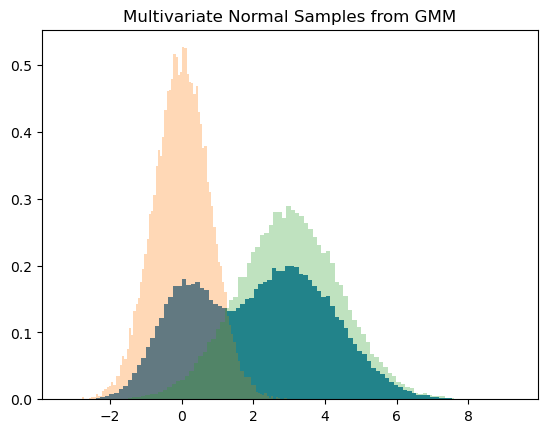

In [118]:
gmm = GaussianMixtureModel(d=1)
gmm.set_params(
    weights=[0.3, 0.7],
    means=[[0], [3]], 
    covariances=np.array([[[0.6]], [[2.0]]])
)
X, Z = plot_multivariate_normal(2, gmm, 100000)
plt.hist(X, bins=100, density=True)
X1 = X[Z == 0]
X2 = X[Z == 1]
plt.hist(X1, bins=100, density=True, alpha=0.3, label='Component 1')
plt.hist(X2, bins=100, density=True, alpha=0.3, label='Component 2')
plt.title('Multivariate Normal Samples from GMM')

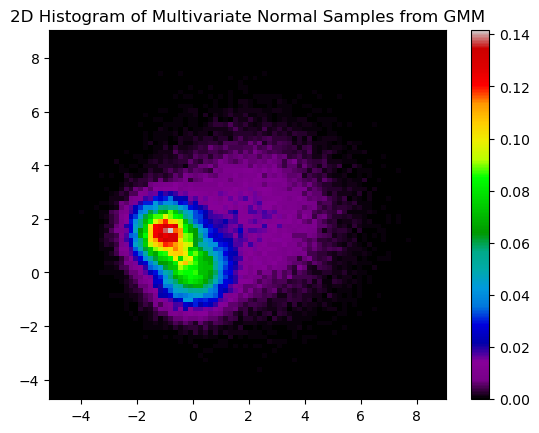

In [149]:
gmm = GaussianMixtureModel(d=2)
gmm.set_params(
    weights=[0.3, 0.3, 0.4],
    means=[[0, 0], [2, 2], [-1, 1.5]], 
    covariances=np.array([[[0.6, 0], [0, 0.6]], [[3.0, 0], [0, 3.0]], [[0.5, 0], [0, 0.5]]])
)
X, Z = plot_multivariate_normal(3, gmm, 100000)
# plt.hist(X[:,0], bins=100, density=True)
# plt.title('distribution of first dimension for d = 2')
# plt.show()
plt.hist2d(X[:,0], X[:,1], bins=(80,80), density=True, cmap = plt.cm.nipy_spectral)
plt.colorbar()
plt.title('2D Histogram of Multivariate Normal Samples from GMM')
plt.show()

## 2 Algorithme d'estimation
